In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors as cls
import time
import pathlib
import gc
## Using uproot3 for now, it would be a good idea to update to 4 later
import uproot3

In [2]:
## Want PIDSubs?
withPIDSubs = False

## Save plots?
save_plots = False

## Polarity
polarity = +1

## Root files
rootFileFolder = str(pathlib.Path.home()) + '/data/failed_events_rootfile/'
noDebugRootFile = rootFileFolder + 'Lb2JPsiL_Run2_Sim_2016_MagUp_v12_NoDebug.root'
debugRootFile = rootFileFolder + 'Lb2JPsiL_Run2_Sim_2016_MagUp_v12_Debug.root'

# Import data

In [3]:
## These are the desired variables to keep
recoBranches = [
    'Lb_ENDVERTEX_X',
    'Lb_ENDVERTEX_Y',
    'Lb_ENDVERTEX_Z',
    'L_ENDVERTEX_X',
    'L_ENDVERTEX_Y',
    'L_ENDVERTEX_Z',
    'Jpsi_ENDVERTEX_X',
    'Jpsi_ENDVERTEX_Y',
    'Jpsi_ENDVERTEX_Z',
    'L_PX',
    'L_PY',
    'L_PZ',
    'Lb_PX',
    'Lb_PY',
    'Lb_PZ',
    'Jpsi_PX',
    'Jpsi_PY',
    'Jpsi_PZ',
    'p_PX',
    'p_PY',
    'p_PZ',
    'pim_PX',
    'pim_PY',
    'pim_PZ',
    'mum_PX',
    'mum_PY',
    'mum_PZ',
    'mup_PX',
    'mup_PY',
    'mup_PZ',
    'Lb_ID',
    'L_ID',
    'Jpsi_ID',
    'mum_ID',
    'mup_ID',
    'p_ID',
    'pim_ID',
    'L_M',
    'L_MM',
    'Lb_M',
    'Lb_MM',
    'Jpsi_M',
    'Jpsi_MM',
    'Lb_BPVDIRA',
    'Lb_BPVIPCHI2',
    'Lb_BPVVDCHI2',
    'Lb_VFASPF_CHI2_VDOF',
    'L_BPVDIRA',
    'L_BPVIPCHI2',
    'L_BPVVDCHI2',
    'L_VFASPF_CHI2_VDOF',
    'Lb_OWNPV_X',
    'Lb_OWNPV_Y',
    'Lb_OWNPV_Z',
    'Lb_OWNPV_CHI2',
    'Lb_OWNPV_NDOF',
    'Lb_DTF_FixJPsi_status',
    'Lb_DTF_FixJPsi_M',
    'Lb_DTF_FixJPsi_P',
    'Lb_DTF_FixJPsi_chi2',
    'Lb_DTF_FixJPsi_nDOF',
    'Lb_DTF_FixJPsi_PV_key',
    'Lb_DTF_FixJPsi_PV_X',
    'Lb_DTF_FixJPsi_PV_Y',
    'Lb_DTF_FixJPsi_PV_Z',
    'Lb_DTF_FixJPsi_Lambda0_M',
    'Lb_DTF_FixJPsi_Lambda0_P',
    'Lb_DTF_FixJPsi_Lambda0_decayLength',
    'Lb_DTF_FixJPsi_Lambda0_piplus_PX',
    'Lb_DTF_FixJPsi_Lambda0_piplus_PY',
    'Lb_DTF_FixJPsi_Lambda0_piplus_PZ',
    'Lb_DTF_FixJPsi_Lambda0_pplus_PX',
    'Lb_DTF_FixJPsi_Lambda0_pplus_PY',
    'Lb_DTF_FixJPsi_Lambda0_pplus_PZ',
    'Lb_DTF_FixJPsi_J_psi_1S_muminus_0_PX',
    'Lb_DTF_FixJPsi_J_psi_1S_muminus_0_PY',
    'Lb_DTF_FixJPsi_J_psi_1S_muminus_0_PZ',
    'Lb_DTF_FixJPsi_J_psi_1S_muminus_PX',
    'Lb_DTF_FixJPsi_J_psi_1S_muminus_PY',
    'Lb_DTF_FixJPsi_J_psi_1S_muminus_PZ',
    'Lb_DTF_FixJPsiLambda_status',
    'Lb_DTF_FixJPsiLambda_M',
    'Lb_DTF_FixJPsiLambda_P',
    'Lb_DTF_FixJPsiLambda_chi2',
    'Lb_DTF_FixJPsiLambda_nDOF',
    'Lb_DTF_FixJPsiLambda_PV_key',
    'Lb_DTF_FixJPsiLambda_PV_X',
    'Lb_DTF_FixJPsiLambda_PV_Y',
    'Lb_DTF_FixJPsiLambda_PV_Z',
    'Lb_DTF_FixJPsiLambda_Lambda0_M',
    'Lb_DTF_FixJPsiLambda_Lambda0_P',
    'Lb_DTF_FixJPsiLambda_Lambda0_decayLength',
    'Lb_DTF_FixJPsiLambda_Lambda0_piplus_PX',
    'Lb_DTF_FixJPsiLambda_Lambda0_piplus_PY',
    'Lb_DTF_FixJPsiLambda_Lambda0_piplus_PZ',
    'Lb_DTF_FixJPsiLambda_Lambda0_pplus_PX',
    'Lb_DTF_FixJPsiLambda_Lambda0_pplus_PY',
    'Lb_DTF_FixJPsiLambda_Lambda0_pplus_PZ',
    'Lb_DTF_FixJPsiLambda_J_psi_1S_muminus_0_PX',
    'Lb_DTF_FixJPsiLambda_J_psi_1S_muminus_0_PY',
    'Lb_DTF_FixJPsiLambda_J_psi_1S_muminus_0_PZ',
    'Lb_DTF_FixJPsiLambda_J_psi_1S_muminus_PX',
    'Lb_DTF_FixJPsiLambda_J_psi_1S_muminus_PY',
    'Lb_DTF_FixJPsiLambda_J_psi_1S_muminus_PZ'
]

if withPIDSubs:
    PIDSubsBranches = [
        'Lb_DTF_FixJPsi_PIDSubs_status',
        'Lb_DTF_FixJPsi_PIDSubs_M',
        'Lb_DTF_FixJPsi_PIDSubs_P',
        'Lb_DTF_FixJPsi_PIDSubs_chi2',
        'Lb_DTF_FixJPsi_PIDSubs_nDOF',
        'Lb_DTF_FixJPsi_PIDSubs_PV_key',
        'Lb_DTF_FixJPsi_PIDSubs_PV_X',
        'Lb_DTF_FixJPsi_PIDSubs_PV_Y',
        'Lb_DTF_FixJPsi_PIDSubs_PV_Z',
        'Lb_DTF_FixJPsi_PIDSubs_Lambda0_M',
        'Lb_DTF_FixJPsi_PIDSubs_Lambda0_P',
        'Lb_DTF_FixJPsi_PIDSubs_Lambda0_decayLength',
        'Lb_DTF_FixJPsi_PIDSubs_Lambda0_piplus_PX',
        'Lb_DTF_FixJPsi_PIDSubs_Lambda0_piplus_PY',
        'Lb_DTF_FixJPsi_PIDSubs_Lambda0_piplus_PZ',
        'Lb_DTF_FixJPsi_PIDSubs_Lambda0_pplus_PX',
        'Lb_DTF_FixJPsi_PIDSubs_Lambda0_pplus_PY',
        'Lb_DTF_FixJPsi_PIDSubs_Lambda0_pplus_PZ',
        'Lb_DTF_FixJPsi_PIDSubs_J_psi_1S_muminus_0_PX',
        'Lb_DTF_FixJPsi_PIDSubs_J_psi_1S_muminus_0_PY',
        'Lb_DTF_FixJPsi_PIDSubs_J_psi_1S_muminus_0_PZ',
        'Lb_DTF_FixJPsi_PIDSubs_J_psi_1S_muminus_PX',
        'Lb_DTF_FixJPsi_PIDSubs_J_psi_1S_muminus_PY',
        'Lb_DTF_FixJPsi_PIDSubs_J_psi_1S_muminus_PZ',
        'Lb_DTF_FixJPsiLambda_PIDSubs_status',
        'Lb_DTF_FixJPsiLambda_PIDSubs_M',
        'Lb_DTF_FixJPsiLambda_PIDSubs_P',
        'Lb_DTF_FixJPsiLambda_PIDSubs_chi2',
        'Lb_DTF_FixJPsiLambda_PIDSubs_nDOF',
        'Lb_DTF_FixJPsiLambda_PIDSubs_PV_key',
        'Lb_DTF_FixJPsiLambda_PIDSubs_PV_X',
        'Lb_DTF_FixJPsiLambda_PIDSubs_PV_Y',
        'Lb_DTF_FixJPsiLambda_PIDSubs_PV_Z',
        'Lb_DTF_FixJPsiLambda_PIDSubs_Lambda0_M',
        'Lb_DTF_FixJPsiLambda_PIDSubs_Lambda0_P',
        'Lb_DTF_FixJPsiLambda_PIDSubs_Lambda0_decayLength',
        'Lb_DTF_FixJPsiLambda_PIDSubs_Lambda0_piplus_PX',
        'Lb_DTF_FixJPsiLambda_PIDSubs_Lambda0_piplus_PY',
        'Lb_DTF_FixJPsiLambda_PIDSubs_Lambda0_piplus_PZ',
        'Lb_DTF_FixJPsiLambda_PIDSubs_Lambda0_pplus_PX',
        'Lb_DTF_FixJPsiLambda_PIDSubs_Lambda0_pplus_PY',
        'Lb_DTF_FixJPsiLambda_PIDSubs_Lambda0_pplus_PZ',
        'Lb_DTF_FixJPsiLambda_PIDSubs_J_psi_1S_muminus_0_PX',
        'Lb_DTF_FixJPsiLambda_PIDSubs_J_psi_1S_muminus_0_PY',
        'Lb_DTF_FixJPsiLambda_PIDSubs_J_psi_1S_muminus_0_PZ',
        'Lb_DTF_FixJPsiLambda_PIDSubs_J_psi_1S_muminus_PX',
        'Lb_DTF_FixJPsiLambda_PIDSubs_J_psi_1S_muminus_PY',
        'Lb_DTF_FixJPsiLambda_PIDSubs_J_psi_1S_muminus_PZ',
        'TrackType'
    ]
else:
    PIDSubsBranches = []
    
truthBranches = [
    'Lb_TRUEENDVERTEX_X',
    'Lb_TRUEENDVERTEX_Y',
    'Lb_TRUEENDVERTEX_Z',
    'L_TRUEENDVERTEX_X',
    'L_TRUEENDVERTEX_Y',
    'L_TRUEENDVERTEX_Z',
    'p_TRUEP_X',
    'p_TRUEP_Y',
    'p_TRUEP_Z',
    'pim_TRUEP_X',
    'pim_TRUEP_Y',
    'pim_TRUEP_Z',
    'mum_TRUEP_X',
    'mum_TRUEP_Y',
    'mum_TRUEP_Z',
    'mup_TRUEP_X',
    'mup_TRUEP_Y',
    'mup_TRUEP_Z',
    'L_MC_MOTHER_ID',
    'pim_MC_MOTHER_ID',
    'Lb_Reconstructible',
    'L_Reconstructible',
    'p_Reconstructible',
    'pim_Reconstructible',
    'Jpsi_Reconstructible',
    'mup_Reconstructible',
    'mum_Reconstructible',
    'Lb_Reconstructed',
    'L_Reconstructed',
    'p_Reconstructed',
    'pim_Reconstructed',
    'Jpsi_Reconstructed',
    'mup_Reconstructed',
    'mum_Reconstructed'
]

branches = recoBranches + truthBranches + PIDSubsBranches

In [4]:
## This is how we rename them according to the Salvatore convention
## Assumed here that muminus_0 is mum and muminus is mup.
## Otherwise the order is kept, so it makes sense.
## These are the desired variables to keep
recoBranches_newNames = [
    'Lb_ENDVERTEX_X',
    'Lb_ENDVERTEX_Y',
    'Lb_ENDVERTEX_Z',
    'L_ENDVERTEX_X',
    'L_ENDVERTEX_Y',
    'L_ENDVERTEX_Z',
    'Jpsi_ENDVERTEX_X',
    'Jpsi_ENDVERTEX_Y',
    'Jpsi_ENDVERTEX_Z',
    'L_PX',
    'L_PY',
    'L_PZ',
    'Lb_PX',
    'Lb_PY',
    'Lb_PZ',
    'Jpsi_PX',
    'Jpsi_PY',
    'Jpsi_PZ',
    'p_PX',
    'p_PY',
    'p_PZ',
    'pim_PX',
    'pim_PY',
    'pim_PZ',
    'mum_PX',
    'mum_PY',
    'mum_PZ',
    'mup_PX',
    'mup_PY',
    'mup_PZ',
    'Lb_ID',
    'L_ID',
    'Jpsi_ID',
    'mum_ID',
    'mup_ID',
    'p_ID',
    'pim_ID',
    'L_M',
    'L_MM',
    'Lb_M',
    'Lb_MM',
    'Jpsi_M',
    'Jpsi_MM',
    'Lb_BPVDIRA',
    'Lb_BPVIPCHI2',
    'Lb_BPVVDCHI2',
    'Lb_VFASPF_CHI2_VDOF',
    'L_BPVDIRA',
    'L_BPVIPCHI2',
    'L_BPVVDCHI2',
    'L_VFASPF_CHI2_VDOF',
    'Lb_OWNPV_X',
    'Lb_OWNPV_Y',
    'Lb_OWNPV_Z',
    'Lb_OWNPV_CHI2',
    'Lb_OWNPV_NDOF',
    'DTF_FixJPsi_status',
    'DTF_FixJPsi_Lb_M',
    'DTF_FixJPsi_Lb_P',
    'DTF_FixJPsi_chi2',
    'DTF_FixJPsi_nDOF',
    'DTF_FixJPsi_PV_key',
    'DTF_FixJPsi_PV_X',
    'DTF_FixJPsi_PV_Y',
    'DTF_FixJPsi_PV_Z',
    'DTF_FixJPsi_L_M',
    'DTF_FixJPsi_L_P',
    'DTF_FixJPsi_L_decayLength',
    'DTF_FixJPsi_pim_PX',
    'DTF_FixJPsi_pim_PY',
    'DTF_FixJPsi_pim_PZ',
    'DTF_FixJPsi_p_PX',
    'DTF_FixJPsi_p_PY',
    'DTF_FixJPsi_p_PZ',
    'DTF_FixJPsi_mum_PX',
    'DTF_FixJPsi_mum_PY',
    'DTF_FixJPsi_mum_PZ',
    'DTF_FixJPsi_mup_PX',
    'DTF_FixJPsi_mup_PY',
    'DTF_FixJPsi_mup_PZ',
    'DTF_FixJPsiLambda_status',
    'DTF_FixJPsiLambda_Lb_M',
    'DTF_FixJPsiLambda_Lb_P',
    'DTF_FixJPsiLambda_chi2',
    'DTF_FixJPsiLambda_nDOF',
    'DTF_FixJPsiLambda_PV_key',
    'DTF_FixJPsiLambda_PV_X',
    'DTF_FixJPsiLambda_PV_Y',
    'DTF_FixJPsiLambda_PV_Z',
    'DTF_FixJPsiLambda_L_M',
    'DTF_FixJPsiLambda_L_P',
    'DTF_FixJPsiLambda_L_decayLength',
    'DTF_FixJPsiLambda_pim_PX',
    'DTF_FixJPsiLambda_pim_PY',
    'DTF_FixJPsiLambda_pim_PZ',
    'DTF_FixJPsiLambda_p_PX',
    'DTF_FixJPsiLambda_p_PY',
    'DTF_FixJPsiLambda_p_PZ',
    'DTF_FixJPsiLambda_mum_PX',
    'DTF_FixJPsiLambda_mum_PY',
    'DTF_FixJPsiLambda_mum_PZ',
    'DTF_FixJPsiLambda_mup_PX',
    'DTF_FixJPsiLambda_mup_PY',
    'DTF_FixJPsiLambda_mup_PZ'
]

if withPIDSubs:
    PIDSubsBranches_newNames = [
        'DTF_FixJPsi_PIDSubs_status',
        'DTF_FixJPsi_PIDSubs_Lb_M',
        'DTF_FixJPsi_PIDSubs_Lb_P',
        'DTF_FixJPsi_PIDSubs_chi2',
        'DTF_FixJPsi_PIDSubs_nDOF',
        'DTF_FixJPsi_PIDSubs_PV_key',
        'DTF_FixJPsi_PIDSubs_PV_X',
        'DTF_FixJPsi_PIDSubs_PV_Y',
        'DTF_FixJPsi_PIDSubs_PV_Z',
        'DTF_FixJPsi_PIDSubs_L_M',
        'DTF_FixJPsi_PIDSubs_L_P',
        'DTF_FixJPsi_PIDSubs_L_decayLength',
        'DTF_FixJPsi_PIDSubs_pim_PX',
        'DTF_FixJPsi_PIDSubs_pim_PY',
        'DTF_FixJPsi_PIDSubs_pim_PZ',
        'DTF_FixJPsi_PIDSubs_p_PX',
        'DTF_FixJPsi_PIDSubs_p_PY',
        'DTF_FixJPsi_PIDSubs_p_PZ',
        'DTF_FixJPsi_PIDSubs_mum_PX',
        'DTF_FixJPsi_PIDSubs_mum_PY',
        'DTF_FixJPsi_PIDSubs_mum_PZ',
        'DTF_FixJPsi_PIDSubs_mup_PX',
        'DTF_FixJPsi_PIDSubs_mup_PY',
        'DTF_FixJPsi_PIDSubs_mup_PZ',
        'DTF_FixJPsiLambda_PIDSubs_status',
        'DTF_FixJPsiLambda_PIDSubs_Lb_M',
        'DTF_FixJPsiLambda_PIDSubs_Lb_P',
        'DTF_FixJPsiLambda_PIDSubs_chi2',
        'DTF_FixJPsiLambda_PIDSubs_nDOF',
        'DTF_FixJPsiLambda_PIDSubs_PV_key',
        'DTF_FixJPsiLambda_PIDSubs_PV_X',
        'DTF_FixJPsiLambda_PIDSubs_PV_Y',
        'DTF_FixJPsiLambda_PIDSubs_PV_Z',
        'DTF_FixJPsiLambda_PIDSubs_L_M',
        'DTF_FixJPsiLambda_PIDSubs_L_P',
        'DTF_FixJPsiLambda_PIDSubs_L_decayLength',
        'DTF_FixJPsiLambda_PIDSubs_pim_PX',
        'DTF_FixJPsiLambda_PIDSubs_pim_PY',
        'DTF_FixJPsiLambda_PIDSubs_pim_PZ',
        'DTF_FixJPsiLambda_PIDSubs_p_PX',
        'DTF_FixJPsiLambda_PIDSubs_p_PY',
        'DTF_FixJPsiLambda_PIDSubs_p_PZ',
        'DTF_FixJPsiLambda_PIDSubs_mum_PX',
        'DTF_FixJPsiLambda_PIDSubs_mum_PY',
        'DTF_FixJPsiLambda_PIDSubs_mum_PZ',
        'DTF_FixJPsiLambda_PIDSubs_mup_PX',
        'DTF_FixJPsiLambda_PIDSubs_mup_PY',
        'DTF_FixJPsiLambda_PIDSubs_mup_PZ',
        'TrackType'
    ]
else:
    PIDSubsBranches_newNames = []
    
truthBranches_newNames = [
    'MCTRUTH_Lb_ENDVERTEX_X',
    'MCTRUTH_Lb_ENDVERTEX_Y',
    'MCTRUTH_Lb_ENDVERTEX_Z',
    'MCTRUTH_L_ENDVERTEX_X',
    'MCTRUTH_L_ENDVERTEX_Y',
    'MCTRUTH_L_ENDVERTEX_Z',
    'MCTRUTH_p_PX',
    'MCTRUTH_p_PY',
    'MCTRUTH_p_PZ',
    'MCTRUTH_pim_PX',
    'MCTRUTH_pim_PY',
    'MCTRUTH_pim_PZ',
    'MCTRUTH_mum_PX',
    'MCTRUTH_mum_PY',
    'MCTRUTH_mum_PZ',
    'MCTRUTH_mup_PX',
    'MCTRUTH_mup_PY',
    'MCTRUTH_mup_PZ',
    'MCTRUTH_Lb_ID',
    'MCTRUTH_L_ID',
    'MCTRUTH_Lb_Reconstructible',
    'MCTRUTH_L_Reconstructible',
    'MCTRUTH_p_Reconstructible',
    'MCTRUTH_pim_Reconstructible',
    'MCTRUTH_Jpsi_Reconstructible',
    'MCTRUTH_mup_Reconstructible',
    'MCTRUTH_mum_Reconstructible',
    'MCTRUTH_Lb_Reconstructed',
    'MCTRUTH_L_Reconstructed',
    'MCTRUTH_p_Reconstructed',
    'MCTRUTH_pim_Reconstructed',
    'MCTRUTH_Jpsi_Reconstructed',
    'MCTRUTH_mup_Reconstructed',
    'MCTRUTH_mum_Reconstructed'
]

branches_newNames = recoBranches_newNames + truthBranches_newNames + PIDSubsBranches_newNames

In [5]:
if len(branches_newNames) != len(branches):
    raise ValueError("Number of columns before and after renaming does not match.")

In [6]:
def RootFileToDataFrame(fileName, branchList):
    with uproot3.open(fileName) as rootFile:
        tree = rootFile['Lb_T/DecayTree']
        ## Load dataFrame with desired branches in a list for future concat
        ## The final part keeps subentries with 0, i.e. best fits
        df = tree.pandas.df(branchList).loc[(slice(None), 0), :]
        
        ## Join the data frames, drop the subentry column (it's all 0 anyway)
        df = df.droplevel(1)
        
        ## Reset indices
        df.reset_index(drop=True, inplace=True)
        
        return df

In [7]:
df_nodebug = RootFileToDataFrame(noDebugRootFile, branches)
df_debug = RootFileToDataFrame(debugRootFile, branches)

In [8]:
## WARNING: pandas gibberish incoming. Proceed at your own risk.
def DebugDFWithStatusFlag(df_debug, df_nodebug):
    ## Bonus: do an inner merge to ensure no extra events from nodebug end up being marked as "nonconverged".
    ## What events? What do I know?
    df_converged = pd.merge(df_debug, df_nodebug, on=list(df_debug), how='inner')
    ## Append df_converged to df_debug. Results in a df with all events, plus a second round of only converged events.
    df_temp = df_debug.append(df_converged) 
    ## Do you see where this is going?
    df_temp['Duplicated'] = df_temp.duplicated(keep=False) ## Marks the duplicated rows with a True
    df_nonconverged = df_temp.loc[~df_temp['Duplicated']].copy() ## Selects only rows which are not duplicated.
    df_nonconverged.drop(columns=['Duplicated'], inplace=True)
        
    ## Finishing touches
    df_nonconverged['VertexFitterStatus'] = 'Failed'
    df_converged['VertexFitterStatus'] = 'Converged'
    
    return pd.concat([df_nonconverged, df_converged], ignore_index=True)

In [9]:
df_full = DebugDFWithStatusFlag(df_debug, df_nodebug)

In [10]:
if(len(df_debug) - len(df_nodebug) != sum(df_full['VertexFitterStatus'] == 'Failed')):
    raise ValueError("Number of events with failed status does not match debug vs. no debug discrepancy.")

In [11]:
columnDictionary = {}
for oldName, newName in zip(branches, branches_newNames):
    columnDictionary[oldName] = newName

In [12]:
df_full.rename(columns=columnDictionary, inplace=True)

In [13]:
df_full['polarity'] = polarity

In [14]:
df_full

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,MCTRUTH_mum_Reconstructible,MCTRUTH_Lb_Reconstructed,MCTRUTH_L_Reconstructed,MCTRUTH_p_Reconstructed,MCTRUTH_pim_Reconstructed,MCTRUTH_Jpsi_Reconstructed,MCTRUTH_mup_Reconstructed,MCTRUTH_mum_Reconstructed,VertexFitterStatus,polarity
0,0.979173,-0.239833,-64.816292,117.773293,81.120241,4519.532659,0.9792,-0.2400,-64.8159,799.747710,...,2,0,0,4,4,0,1,1,Failed,1
1,0.503910,-1.401719,34.398241,17.321301,-438.571736,6586.978362,0.5173,-1.3766,33.9172,674.138940,...,2,0,0,4,4,0,1,1,Failed,1
2,0.916428,-0.217192,-75.509620,266.983693,-325.565867,6387.654927,0.9231,-0.2172,-75.4493,6551.396422,...,2,0,0,4,4,0,1,1,Failed,1
3,0.866263,-0.006711,18.961329,119.356209,179.665595,4385.049455,0.8664,-0.0067,18.9608,1150.904206,...,2,0,0,4,4,0,1,1,Failed,1
4,1.056412,-1.284202,51.750635,148.974915,-1073.243522,4875.499385,1.0594,-1.2785,51.7087,16818.376980,...,2,0,0,4,4,0,1,1,Failed,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.805101,-0.067725,-6.943620,-232.512490,214.867616,3724.024651,0.8051,-0.0677,-6.9436,-2089.459053,...,2,0,0,4,4,0,1,1,Converged,1
117,1.108198,-0.155312,-47.314809,345.648672,43.852292,4381.713763,1.1082,-0.1553,-47.3148,2485.169101,...,2,0,0,4,4,0,1,1,Converged,1
118,1.029511,-0.230128,-20.454931,593.077632,193.184027,4914.675864,1.0296,-0.2306,-20.4526,1884.590988,...,2,0,0,4,4,0,1,1,Converged,1
119,1.101364,-0.737077,67.994382,363.661658,-55.080362,5695.448012,1.1019,-0.7389,67.9972,10606.205807,...,2,0,0,4,4,0,1,1,Converged,1


# Analyze results

In [15]:
## Create plots directory, if missing
plotsDirectory = (
    str(pathlib.Path.home())
    + '/vertex-reconstruction-studies/plots/studies_on_full_data/failed_event_direct_analysis/')
pathlib.Path(plotsDirectory).mkdir(parents=True, exist_ok=True)

## Colors
fullColor = 'grey'
matterColor = 'tab:red'
antimatterColor = 'tab:green'

In [16]:
## series: a pandas.Series to plot, e.g. a column of a data frame
## matterCharge: either 'matter', 'antimatter' or 'both'
## polarity: either +1 or -1 (up and down respectively) or 'both'
## plotTitle: title of the plot (no way)
## seriesLabel: the label for the x-axis
## seriesFileName: the name of the plot file (after prefixes)
## binning: no. of bins.
## boundaries: range of the histogram (2-ple)
## scale: argument for plt.yscale()
## scientificNotation: if True, use scientific notation for x axis
def PlotSingleHistogram(
    series,
    matterCharge,
    polarity,
    plotTitle,
    seriesLabel,
    seriesFileName,
    binning,
    boundaries,
    scale='linear',
    scientificNotation=False,
    verticalLine=False,
    verticalLineCoordinate=0,
):
    
    if matterCharge == 'matter':
        matterChargeCut = (df_full['p_ID'] == 2212)
        customColor = matterColor
        matterSubtitle = "Only $\Lambda_b$ decays"
        matterPrefix = 'matter'
    elif matterCharge == 'antimatter':
        matterChargeCut = (df_full['p_ID'] == -2212)
        customColor = antimatterColor
        matterSubtitle = "Only anti-$\Lambda_b$ decays"
        matterPrefix = 'antimatter'
    elif matterCharge == 'both':
        matterChargeCut = (pd.Series(True,index=df_full.index))
        customColor = fullColor
        matterSubtitle = "$\Lambda_b$ + anti-$\Lambda_b$ decays"
        matterPrefix = 'allmatter'
    else:
        raise ValueError("Argument matterCharge must be either 'matter', 'antimatter' or 'both'.")
        
    if polarity == 'both':
        polarityCut = (pd.Series(True,index=df_full.index))
        polaritySubtitle = "MagUp & MagDown"
        polarityPrefix = 'MagUpDown'
    elif polarity in [1,-1]:
        polarityCut = (df_full['polarity'] == polarity)
        if polarity == 1:
            polaritySubtitle = "MagUp only"
            polarityPrefix = 'MagUp'
        else:
            polaritySubtitle = "MagDown only"
            polarityPrefix = 'MagDown'
    else:
        raise ValueError("Argument polarity must be either +1, -1, or 'both'.")
    
    variables = series.loc[matterChargeCut & polarityCut]
    
    plt.hist(variables,
             bins=binning,
             range=boundaries,
             histtype='stepfilled',
             edgecolor=customColor,
             color=cls.to_rgba(customColor, alpha=0.1)
    )
    
    if verticalLine:
        plt.axvline(x=verticalLineCoordinate,ymin=0,ymax=10000,linestyle='--',color='k')
    
    plt.grid()
    plt.xlabel(seriesLabel)
    plt.title(plotTitle + "\n" + "(" + matterSubtitle + ", " + polaritySubtitle + ")")
    plt.yscale(scale)
    plt.ylabel("Events")
    if scientificNotation:
        plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    if save_plots:
        plt.savefig(plotsDirectory + matterPrefix + "_" + polarityPrefix + "_" + seriesFileName + '.pdf', bbox_inches='tight')
    plt.show()

## Proton true $p_x$
### Converged events

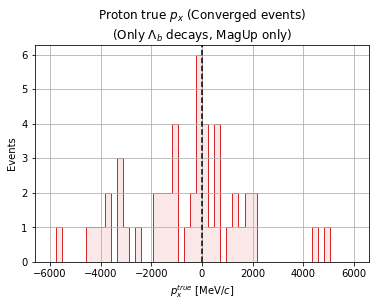

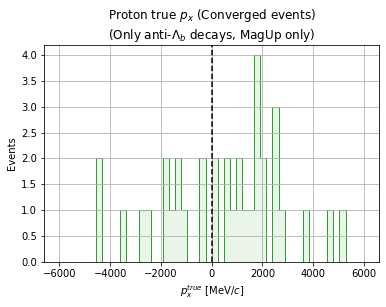

In [17]:
for matterCharge in ['matter', 'antimatter']:
    plotArgs = {
        "matterCharge": matterCharge,
        "polarity": +1,
        "seriesLabel": "$p_x^{true}$ [MeV/$c$]",
        "plotTitle": "Proton true $p_x$ (Converged events)",
        "seriesFileName": "p_PX_MCTRUTH_Converged",
        "scale": "linear",
        "binning": 50,
        "boundaries": (-6000,6000),
        "scientificNotation": False,
        "verticalLine": True
    }

    PlotSingleHistogram(df_full.loc[df_full['VertexFitterStatus'] == 'Converged', 'MCTRUTH_p_PX'], **plotArgs)

### Failed events

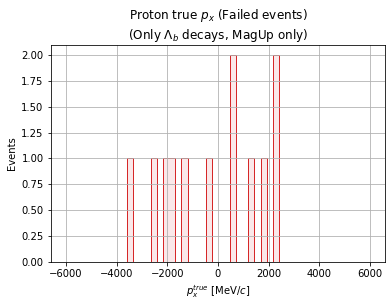

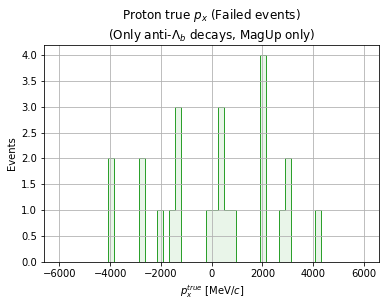

In [18]:
for matterCharge in ['matter', 'antimatter']:
    plotArgs = {
        "matterCharge": matterCharge,
        "polarity": +1,
        "seriesLabel": "$p_x^{true}$ [MeV/$c$]",
        "plotTitle": "Proton true $p_x$ (Failed events)",
        "seriesFileName": "p_PX_MCTRUTH_Failed",
        "scale": "linear",
        "binning": 50,
        "boundaries": (-6000,6000),
        "scientificNotation": False    
    }

    PlotSingleHistogram(df_full.loc[df_full['VertexFitterStatus'] == 'Failed', 'MCTRUTH_p_PX'], **plotArgs)

## Horizontality

In [19]:
def RowAVec(row, p_pvec_column, pim_pvec_column):
    return np.cross(row[p_pvec_column], row[pim_pvec_column])

def RowANorm(row, avec_column):
    return np.linalg.norm(row[avec_column])

In [20]:
def Feature1DComponent(series, component):
    return series.map(lambda x: x[component])

In [21]:
## This computes (once) a new column in df named 'momentaPrefix_h',
## containing the related horizontality. Returns the related column.
def ComputeHorizontality(
    df,
    momentaPrefix,
    p_px_column,
    p_py_column,
    p_pz_column,
    pim_px_column,
    pim_py_column,
    pim_pz_column,
):
      
    p_pvec_column = momentaPrefix + "_p_p_vec"
    pim_pvec_column = momentaPrefix + "_pim_p_vec"
    avec_column = momentaPrefix + "_a_vec"
    anorm_column = momentaPrefix + "_a_norm"
    ahat_column = momentaPrefix + "_a_hat"
    h_column = momentaPrefix + "_h"
    
    df[p_pvec_column] = list(zip(df[p_px_column], df[p_py_column], df[p_pz_column]))
    df[pim_pvec_column] = list(zip(df[pim_px_column], df[pim_py_column], df[pim_pz_column]))
    df[avec_column] = df.apply(lambda row: RowAVec(row, p_pvec_column, pim_pvec_column), axis=1)
    df[anorm_column] = df.apply(lambda row: RowANorm(row, avec_column), axis=1)
    df[ahat_column] = df[avec_column]/df[anorm_column]
    df[h_column] = Feature1DComponent(df[ahat_column], 1) * df['polarity'] * np.sign(df['L_ID'])
    
    df.drop(columns=[
        p_pvec_column,
        pim_pvec_column,
        avec_column,
        anorm_column,
        ahat_column
    ])
    
    return h_column

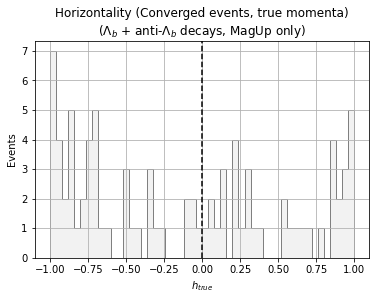

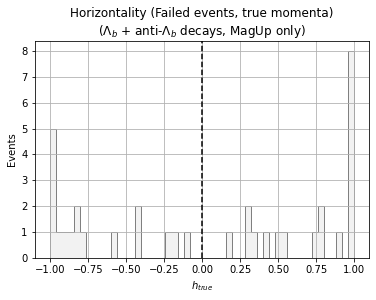

In [22]:
h_column = ComputeHorizontality(
    df_full, "MCTRUTH",
    'MCTRUTH_p_PX', 'MCTRUTH_p_PY', 'MCTRUTH_p_PZ',
    'MCTRUTH_pim_PX', 'MCTRUTH_pim_PY', 'MCTRUTH_pim_PZ',
)

plotArgs = {
    "matterCharge": 'both',
    "polarity": +1,
    "seriesLabel": "$h_{true}$",
    "scale": "linear",
    "binning": 50,
    "boundaries": (-1,1),
    "scientificNotation": False,
    "verticalLine": True
}

for status in ['Converged', 'Failed']:
    plotArgs['plotTitle'] = "Horizontality (" + status + " events, true momenta)"
    plotArgs['seriesFileName'] = "horizontality_MCTRUTH_" + status
    
    PlotSingleHistogram(df_full.loc[df_full.VertexFitterStatus == status, h_column], **plotArgs)

## Other studies

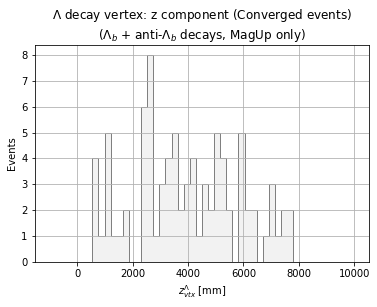

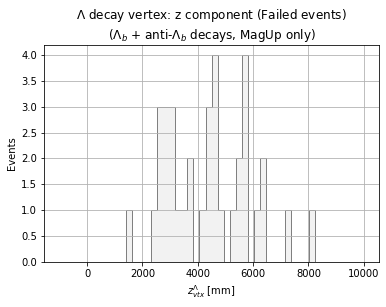

In [23]:
plotArgs = {
    "matterCharge": 'both',
    "polarity": +1,
    "seriesLabel": "$z_{vtx}^\Lambda$ [mm]",
    "scale": "linear",
    "binning": 50,
    "boundaries": (-1000,10000),
    "scientificNotation": False   
}

for status in ['Converged', 'Failed']:
    plotArgs['plotTitle'] = "$\Lambda$ decay vertex: z component (" + status + " events)"
    plotArgs['seriesFileName'] = "MCTRUTH_L_ENDVERTEX_Z_" + status
    
    PlotSingleHistogram(df_full.loc[df_full.VertexFitterStatus == status, 'MCTRUTH_L_ENDVERTEX_Z'], **plotArgs)